# Deep Learning Project - Potato Disease🥔🍃

Human society needs to increase food production by an estimated 70% by 2050 to feed an expected population size that is predicted to be over 9 billion people. Currently, infectious diseases reduce the potential yield by an average of 40% with many farmers in the developing world experiencing yield losses as high as 100%. The widespread distribution of smartphones among crop growers around the world with an expected 5 billion smartphones by 2020 offers the potential of turning the smartphone into a valuable tool for diverse communities growing food. One potential application is the development of mobile disease diagnostics through machine learning and crowdsourcing. Here we announce the release of over 50,000 expertly curated images on healthy and infected leaves of crops plants through the existing online platform PlantVillage. We describe both the data and the platform. These data are the beginning of an on-going, crowdsourcing effort to enable computer vision approaches to help solve the problem of yield losses in crop plants due to infectious diseases via https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [19]:
DIRECTORY = "plantvillage dataset\color"
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANEL = 3
EPOCH = 50

In [20]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DIRECTORY,
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = 'rgb',
    
)

Found 2152 files belonging to 3 classes.


In [21]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [24]:
len(dataset)

68

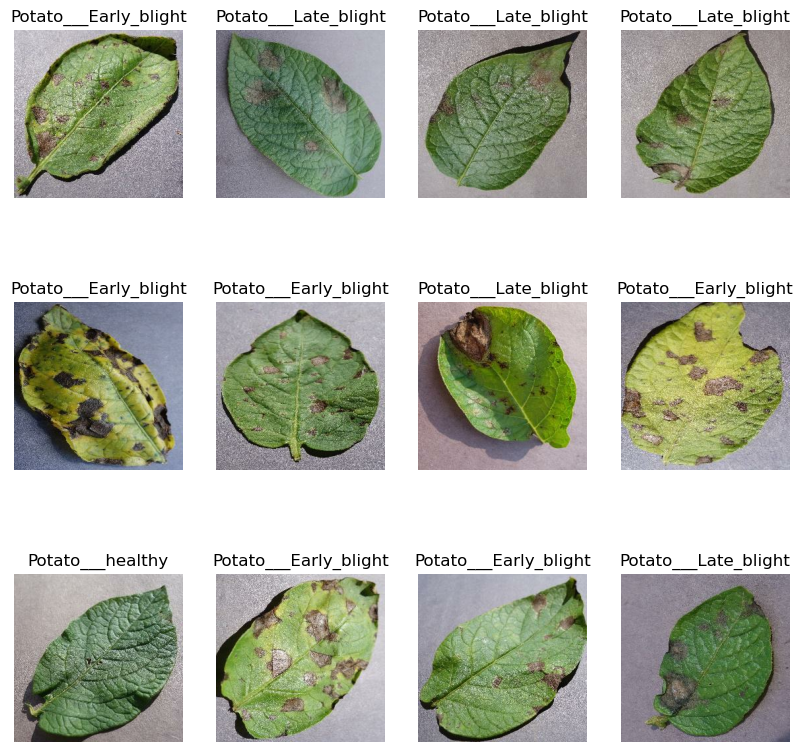

In [25]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# Train, Dev, Test

Now, we split the dataset like,

80% ==> Training
20% ==> 10% Validation, 10% Test

We have 32 batch for 2152 data. Every batch includes:
Number of data in a batch * .8

In [54]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [55]:
train_ds = dataset.take(54)
len(train_ds) # number of batchs (32*54 train data)

54

In [56]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [57]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [58]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [59]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [64]:
def get_dataset_partitions_tf(ds, train_split= 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [65]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [66]:
len(train_ds)

54

In [67]:
len(val_ds)

6

In [68]:
len(test_ds)

8

In [70]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)